<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Reading csv file</h1>

In [2]:
df=pd.read_csv("sales_pro.csv")

<h1>Initial head and tail for seeing the data</h1>

In [3]:
df.head()

,sales_id,employee_id,customer_id,product_id,quantity,sales_date,transaction_id,week_start,month,year,total_price
0,11034,226,90412,357,3,2023-01-01 00:00:10,71df1ca8-bf62-4f5a-a596-4181451918ad,2022-12-26,1,2023,2.7
1,4487,63,66963,163,5,2023-01-01 00:00:12,a9ef5b45-e547-422c-b304-72b2a32ad2cf,2022-12-26,1,2023,101.5
2,7105,54,4612,241,2,2023-01-01 00:00:13,4a7ad5f9-da1d-4417-88cf-09252fab3612,2022-12-26,1,2023,54.4
3,5861,40,91195,441,10,2023-01-01 00:00:15,13db6d87-aea1-4048-8b07-522d9c2c1573,2022-12-26,1,2023,28.0
4,6705,227,60153,108,2,2023-01-01 00:00:18,228a0f8a-783b-486f-8f61-b5f78faf9ab2,2022-12-26,1,2023,45.2


In [4]:
df.tail()

,sales_id,employee_id,customer_id,product_id,quantity,sales_date,transaction_id,week_start,month,year,total_price
12013931,12012931,38,45667,359,2,2025-12-13 23:59:27,c46df962-da38-45d8-9584-6c3bda298f21,2025-12-08,12,2025,61.8
12013932,12006271,128,92685,438,1,2025-12-13 23:59:41,7e87391b-6cbf-49fb-82bb-4e3a680403a8,2025-12-08,12,2025,22.0
12013933,11998884,22,69964,72,6,2025-12-13 23:59:44,162bf6d9-96e6-4145-8a48-d90b594d129d,2025-12-08,12,2025,38.4
12013934,12004438,136,48346,375,4,2025-12-13 23:59:46,7b38a010-c021-472c-8388-294ebd5a2b65,2025-12-08,12,2025,8.4
12013935,12011347,107,84357,152,2,2025-12-13 23:59:48,6beb8a05-2f7f-4406-832f-c380d8ab624a,2025-12-08,12,2025,12.4


<h1>Finding datatypes for each column</h1>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12013936 entries, 0 to 12013935
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   sales_id        int64  
 1   employee_id     int64  
 2   customer_id     int64  
 3   product_id      int64  
 4   quantity        int64  
 5   sales_date      object 
 6   transaction_id  object 
 7   week_start      object 
 8   month           int64  
 9   year            int64  
 10  total_price     float64
dtypes: float64(1), int64(7), object(3)
memory usage: 1008.2+ MB


<h1> Checking for Null Values</h1>

In [6]:
df.isnull().sum()

sales_id          0
employee_id       0
customer_id       0
product_id        0
quantity          0
sales_date        0
transaction_id    0
week_start        0
month             0
year              0
total_price       0
dtype: int64

<h1> Understanding our data

In [7]:
df.describe().apply(lambda s: s.apply('{:.2f}'.format))

,sales_id,employee_id,customer_id,product_id,quantity,month,year,total_price
count,12013936.00,12013936.00,12013936.00,12013936.00,12013936.00,12013936.00,12013936.00,12013936.00
mean,6006968.50,125.50,49367.83,229.88,3.28,6.44,2023.98,35.76
std,3468124.74,72.17,28514.43,128.22,2.30,3.40,0.81,22.78
min,1.00,1.00,1.00,1.00,1.00,1.00,2023.00,0.30
25%,3003484.75,63.00,24670.00,121.00,2.00,3.00,2023.00,18.80
50%,6006968.50,126.00,49368.00,234.00,3.00,6.00,2024.00,30.40
75%,9010452.25,188.00,74067.00,339.00,5.00,9.00,2025.00,50.20
max,12013936.00,250.00,98759.00,452.00,10.00,12.00,2025.00,107.50


In [8]:
df.shape

(12013936, 11)

<h1> Finding Duplicates

In [9]:
# as sales id is unique identifier we ca check duplicates based on that
duplicates = df[df.duplicated(subset=['sales_id'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [sales_id, employee_id, customer_id, product_id, quantity, sales_date, transaction_id, week_start, month, year, total_price]
Index: []


<h1> Checking for Negative Quantity

In [10]:
# we are checking it beacause quantity should not be negative 
negative_qty = df[df['quantity'] < 0]
print(negative_qty)

Empty DataFrame
Columns: [sales_id, employee_id, customer_id, product_id, quantity, sales_date, transaction_id, week_start, month, year, total_price]
Index: []


In [11]:
negative_qty = df[df['total_price'] < 0]
print(negative_qty)

Empty DataFrame
Columns: [sales_id, employee_id, customer_id, product_id, quantity, sales_date, transaction_id, week_start, month, year, total_price]
Index: []


<h1> Future data check 

In [12]:
# removing rows with future dates 
current_year=2025
current_month=11

future_dates_filter = (df['year'] > current_year) | ((df['year'] == current_year) & (df['month'] > current_month))
print(f"Number of future sales records found: {df[future_dates_filter].shape[0]}")

df=df[~future_dates_filter]
df.shape[0]

Number of future sales records found: 140897


11873039

In [13]:
# checkking for imvalid month values 
invalid_month_filter = (df['month'] < 1) | (df['month'] > 12)
print(f"\nNumber of invalid month entries found: {df[invalid_month_filter].shape[0]}")


Number of invalid month entries found: 0


In [14]:
# converting to datetime format for better handling
df['sales_date']=pd.to_datetime(df['sales_date'],errors='coerce')
df['week_start']=pd.to_datetime(df['week_start'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11873039 entries, 0 to 11873038
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   sales_id        int64         
 1   employee_id     int64         
 2   customer_id     int64         
 3   product_id      int64         
 4   quantity        int64         
 5   sales_date      datetime64[ns]
 6   transaction_id  object        
 7   week_start      datetime64[ns]
 8   month           int64         
 9   year            int64         
 10  total_price     float64       
dtypes: datetime64[ns](2), float64(1), int64(7), object(1)
memory usage: 1.1+ GB


In [15]:
len(df['product_id'].unique())

452

<h1> Finding top 10 most selling products

In [16]:
product_sales_quantity = df.groupby('product_id')['quantity'].sum().reset_index()
product_sales_quantity.rename(columns={'quantity': 'total_quantity_sold'}, inplace=True)

top_10_products = product_sales_quantity.sort_values(
    by='total_quantity_sold',
    ascending=False
).head(10)

total_dataset_quantity = product_sales_quantity['total_quantity_sold'].sum()
top_10_quantity = top_10_products['total_quantity_sold'].sum()
percentage_contribution = (top_10_quantity / total_dataset_quantity) * 100
print(top_10_products)
print(f"Total Quantity Sold by all products: {total_dataset_quantity:,.0f}")
print(f"Total Quantity Sold by Top 10 products: {top_10_quantity:,.0f}")
print(f"Percentage Contribution of Top 10: {percentage_contribution:.2f}%")

     product_id  total_quantity_sold
297         298               804315
152         153               729736
374         375               462870
447         448               349535
149         150               341849
19           20               327761
309         310               270778
119         120               226637
164         165               224223
436         437               222124
Total Quantity Sold by all products: 38,942,765
Total Quantity Sold by Top 10 products: 3,959,828
Percentage Contribution of Top 10: 10.17%


In [17]:
product_sales = df.groupby("product_id")["quantity"].sum().reset_index()
product_sales = product_sales.sort_values("quantity", ascending=False)
total = product_sales["quantity"].sum()
product_sales["percent"] = (product_sales["quantity"] / total) * 100
print(product_sales.head(10))


     product_id  quantity   percent
297         298    804315  2.065377
152         153    729736  1.873868
374         375    462870  1.188590
447         448    349535  0.897561
149         150    341849  0.877824
19           20    327761  0.841648
309         310    270778  0.695323
119         120    226637  0.581975
164         165    224223  0.575776
436         437    222124  0.570386


<h1> Finding pattern 

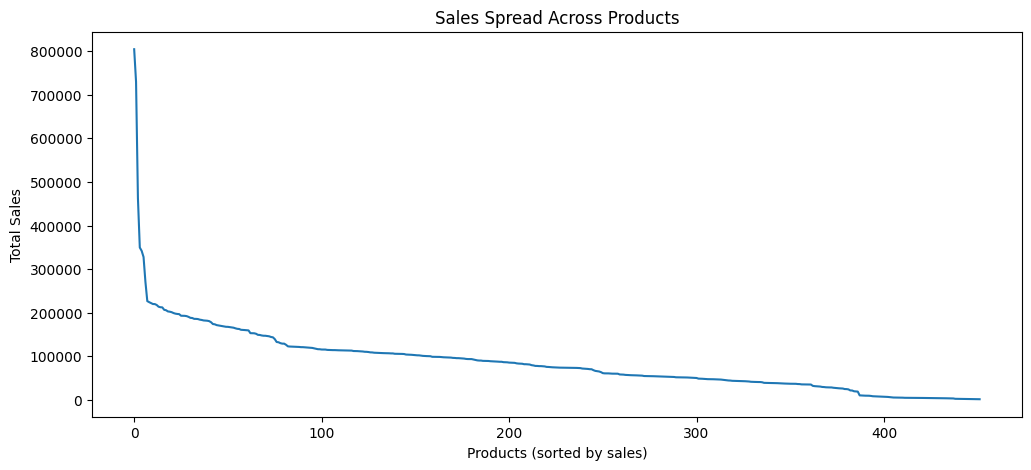

In [18]:
# sales spread accross products 
plt.figure(figsize=(12,5))
plt.plot(product_sales["quantity"].values)
plt.title("Sales Spread Across Products")
plt.xlabel("Products (sorted by sales)")
plt.ylabel("Total Sales")
plt.show()


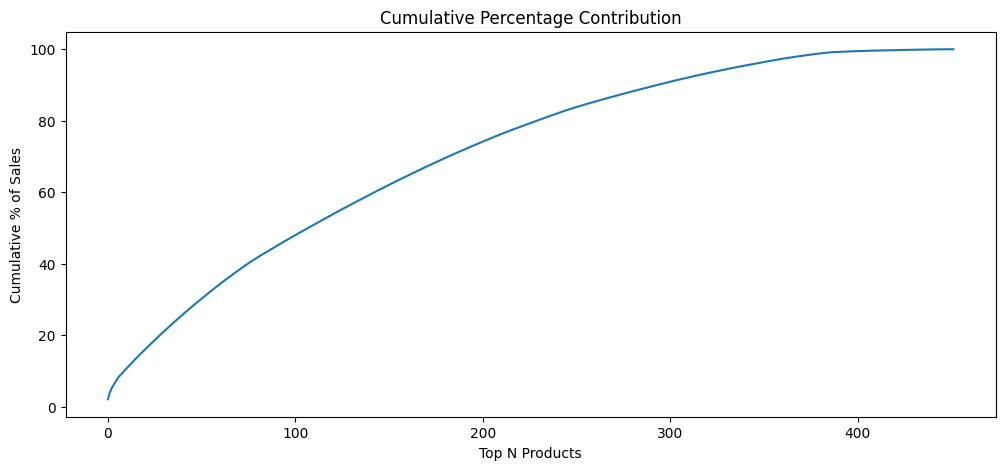

In [19]:
# contribution of top n products
product_sales["cum_percent"] = product_sales["percent"].cumsum()

plt.figure(figsize=(12,5))
plt.plot(product_sales["cum_percent"].values)
plt.title("Cumulative Percentage Contribution")
plt.xlabel("Top N Products")
plt.ylabel("Cumulative % of Sales")
plt.show()


<h1> Creating new csv file for top 10 products

In [20]:
top_10_ids=[298, 153, 375, 448, 150, 20, 310, 120, 165, 437]
columns_need=['sales_date', 'product_id', 'quantity', 'total_price','employee_id', 'customer_id', 'month', 'year']
df_top10=df[df['product_id'].isin(top_10_ids)][columns_need].copy()
df_top10['sales_date']=pd.to_datetime(df_top10['sales_date']).dt.normalize()
df_top10['days_of_week']=df_top10['sales_date'].dt.day_name()
df_top10.to_csv("top_10_sales_data.csv",index=False)
